In [3]:
import numpy as np
from lamp import Linear, Tanh, Sigmoid, MSELoss
from lamp.utils.usps import *

In [4]:
datax,datay = load_usps("../data/USPS_train.txt")
testx,testy = load_usps("../data/USPS_test.txt")

## Non-Linear

In [5]:
neg, pos = 6, 9
data69x,data69y = get_usps([neg,pos],datax,datay)
test69x,test69y = get_usps([neg,pos],testx,testy)
data69y = np.where(data69y == pos, 1, 0).reshape(-1, 1)
test69y = np.where(test69y == pos, 1, 0).reshape(-1, 1)

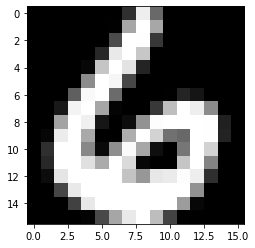

In [6]:
show_usps(datax[0])

In [7]:
batch_size, input_size = data69x.shape
hidden_size = 128

In [8]:
model = [Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, 1), Sigmoid()]
mse = MSELoss()

In [11]:
input = data69x
inputs = []
for module in model:
    input = module.forward(input)
    inputs.append(input)

input

array([[9.95730295e-01],
       [5.10472697e-01],
       [3.58164256e-01],
       ...,
       [1.58273203e-04],
       [5.20119859e-01],
       [2.69030552e-06]])

In [12]:
loss = mse.forward(data69y, input)
loss

array([[0.99147882],
       [0.26058237],
       [0.12828163],
       ...,
       [0.99968348],
       [0.23028495],
       [0.99999462]])

In [13]:
delta = mse.backward(data69y, loss)
deltas = []

for idx in range(len(model)-1, 0, -1):
    delta = model[idx].backward_delta(inputs[idx-1], delta)
    deltas.append(delta)

delta

array([[ 1.49076283e-12,  6.63457477e-05, -5.36553097e-04, ...,
        -2.00905500e-03, -1.73880896e-07, -4.49564715e-04],
       [ 2.18058124e-05,  3.49412515e-02, -9.57850684e-08, ...,
        -2.30352775e-02, -1.77034311e-07, -2.93150560e-06],
       [ 1.45701439e-07,  6.93854976e-08, -1.30666875e-06, ...,
        -1.35757599e-15, -4.54150432e-04, -1.27957011e-09],
       ...,
       [-2.48067714e-22, -8.45923229e-12,  7.11457453e-17, ...,
         9.99675398e-09,  4.45619214e-17,  5.56740145e-09],
       [-3.40439455e-06, -2.52524851e-10,  9.45944660e-11, ...,
         1.05099133e-04,  1.06794786e-09,  3.30235314e-03],
       [-1.10761419e-23, -7.66251479e-16,  1.22634817e-25, ...,
         5.72298203e-19,  1.75595322e-17,  1.67322493e-17]])

## Multi-Class